## Using Graphs to represent images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from PIL import Image
from rembg import remove

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

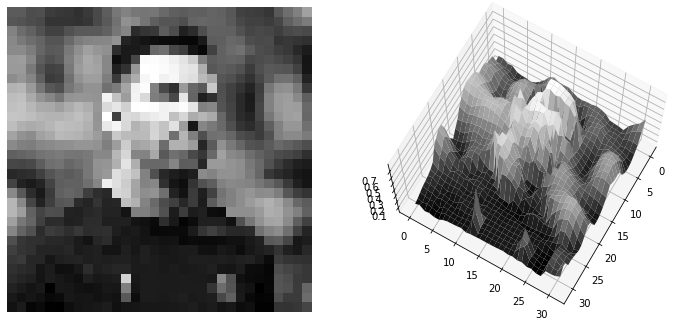

In [4]:
#original pic
from mpl_toolkits.mplot3d import Axes3D

I = rgb2gray(plt.imread('messi-small.png'))
xx, yy = np.mgrid[0:I.shape[0], 0:I.shape[1]]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection='3d')

ax1.imshow(I,cmap='gray')
ax1.axis('off')
ax2.plot_surface(xx, yy, I ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
ax2.view_init(elev=70., azim=30)

/home/paula/.local/lib/python3.8/site-packages/rembg/session_base.py:24: RuntimeWarning: invalid value encountered in divide
  im_ary = im_ary / np.max(im_ary)


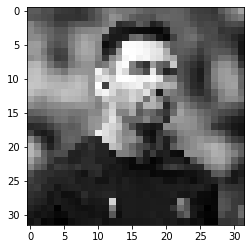

In [14]:
#Preprocessing
I = rgb2gray(plt.imread('messi-small.png'))
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        if I[i][j] == 0:
            I[i][j] = 0.0001
plt.imshow(I, cmap = "gray")
r = remove(I)
plt.imsave('messi_small-bg.png', I)

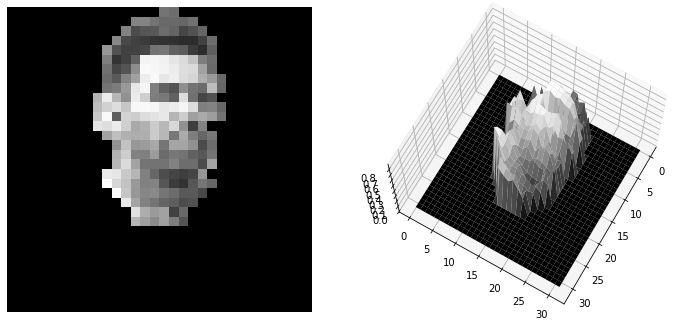

In [15]:
#Object to find
I2 = rgb2gray(plt.imread('messi_small-bg-remove.png'))
xx, yy = np.mgrid[0:I2.shape[0], 0:I2.shape[1]]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection='3d')

ax1.imshow(I2,cmap='gray')
ax1.axis('off')
ax2.plot_surface(xx, yy, I2 ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
ax2.view_init(elev=70., azim=30)

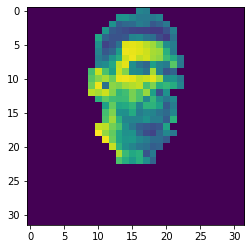

In [22]:
I2 = rgb2gray(plt.imread('messi_small-bg-remove.png'))
plt.imshow(I2)

In [16]:
I.shape
I2.shape

(32, 32)

In [18]:
G1 = nx.grid_graph((I.shape[0], I.shape[1]))
G2 = nx.Graph()

for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        G1.nodes[(i, j)]["weight"] = I[i][j] 
        if I2[i][j] != 0:
            G2.add_node((i, j), weight = I[i][j])

In [19]:
import networkx.algorithms.isomorphism as iso

In [20]:
em = iso.numerical_edge_match("weight", 1)

nx.is_isomorphic(G1, G2, edge_match=em)

False

In [21]:
g = iso.GraphMatcher(G1, G2)
g.subgraph_is_isomorphic()

True